Modelo para predecir el precio de las casa en boston de acuerdo al numero de habitaciones que cuenta la vivienda

Utilizaremos uno de los dataset disponibles en la libreria scikitLern y es el correspondiente a la librería Boston House, dento de la libreria de scikitLarn se dispone de varios dataset básicos para practicar conocimientos de MachineLearning, pero cumplen con la mayor cantidad de algoritmos de regresión y clasificación.

### Librerias a utilizar

In [1]:
#Se importan las librerias a utilizar
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

### Preparar la data

In [4]:
#Importamos los datos de la misma libreria de scikit-Learn
boston = datasets.load_boston()
print(boston)
print()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

verfificar la informacion contenida en el dataset, para este fin utilizamos la instrucción keys para verfificar el dataset con que informacion cuenta

1. data
2. target que seria la columna con las etiquetas o respuestas
3. feature_names que seria el nombre de cada una de las colmunas de la data
4. Descr que seria la descripcion total del dataset

In [5]:
#Veamos las caracteristicas del dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#Con Sheap vemos la cantidad de datos con el que contamos
print(boston.data.shape)

(506, 13)


In [7]:
#Verifico la informacion de las columnas
print('Nombres columnas')
print(boston.feature_names)

Nombres columnas
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Solamente vamos a utilizar la columna correspondiente al numero de habitaciones con la que cuenta la casa esta seria RM

Procedemos a preparar los datos que vamos a utilizar para crear el modelo para este ejemplo vamos a implementar un predictor de regresion lineal simple
- Para este algoritmo solo se necesitará una variable independiente en este caso el numero de habitaciones, pero solo se debe seleccionar una

### Preparar la Regresión Lineal Simple

In [8]:
#Seleccionamos solamente la columna 5 del dataset
X = boston.data[:,np.newaxis, 5]

In [9]:
#Defino los datos correspondientes a las etiquetas
y = boston.target

Grafiquemos los datos para en una grafica de dispersion para ver la distribucion de los datos el cual tiene un error muy alto 

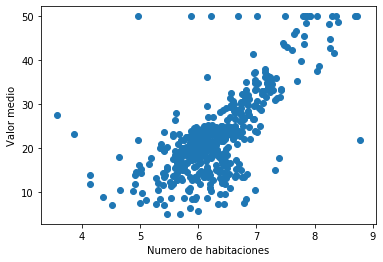

In [12]:
#Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor medio')
plt.show()

### Implementacion de regresion Lineal

Debemos separar los datos en entrenamiento y prueba tenemos la instruccion train test y split no sin antes importar la libreria, para la separacion de datos vamos a tomar un 20 porciento de los mismos para utlizarlos como prueba una vez que hayamos obtenido el modelo.

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
#Separo los datos con "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

In [18]:
#Entreno el modelo
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#Realizo una prediccion
Y_pred = lr.predict(X_test)

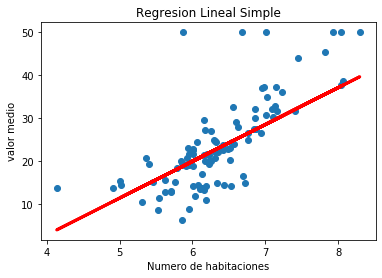

In [20]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color ='red', linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('Numero de habitaciones')
plt.ylabel('valor medio')
plt.show()

La linea roja es el modelo y los puntos azules son los datos de prueba con lo que lo entrenamos, el objetivo de este algoritmo es que el modelo o la linea abarque el mayor numero de muestras y de esta manera disminuir el error que vendria siendo la distancia desde la linea hasta el punto, todos los datos fuera de la linea serian errores, es por esto que cuando realizamos la compraracion de los datos anteriormente nos encontramos que varios tenian una diferencia considerable, la razon de esto es que el modelo no abarco todos los puntos.

La razón es por que los datos se encuentran muy dispersos, por lo que es muy dificil que la linea cubriera la mayoria de los datos y vamos a obtener una mala presicion.

Esto no quiere decir que este algoritmo es malo, sino que este algoritmo no es bueno para este conjunto de datos.

In [21]:
#Calculemos los valores de la pendiente y la intersección para ver como queda la ecución del modelo
print()
print('DATOS DEL MODELO REGRESIÓN LINEAL')
print()
print('valor de la pendiente o coeficiente "a":')
print(lr.coef_)


DATOS DEL MODELO REGRESIÓN LINEAL

valor de la pendiente o coeficiente "a":
[8.58955135]


Recordar que la regresion lineal simple viene representada como y = ax + b por lo tanto para el modelo construido "a"=8.58

In [22]:
print('valor de la intersección o coeficiente "b":')
print(lr.intercept_)

valor de la intersección o coeficiente "b":
-31.628309129265794


In [23]:
print()
print('La ecuacion del modelo es igual a: ')
print('y= ', lr.coef_, 'x ', lr.intercept_)


La ecuacion del modelo es igual a: 
y=  [8.58955135] x  -31.628309129265794


In [24]:
#Calculemos la presicion del algoritmo el cual devuelve el resultado de la estadistica R al cuadrado
print()
print('Precision del modelo: ')
print(lr.score(X_train, y_train))


Precision del modelo: 
0.4603320672038501
